Description of the Model Development Process 🛠️🌾
Data Preparation 📂:

The dataset was loaded and cleaned, ensuring there were no missing values.
Key features like Year, Rainfall, and Irrigation_Area were selected for prediction of Crop_Yield (kg/ha).
Model Selection & Hyperparameter Tuning 🎛️:

A Random Forest Regressor was chosen for its ability to handle non-linear relationships and feature interactions.
Hyperparameters (e.g., n_estimators, max_depth) were optimized using GridSearchCV to achieve the best performance.
Model Evaluation 📊:

Performance metrics like Mean Squared Error (MSE) and R-squared (R²) were calculated to assess accuracy.
A scatter plot was used to visualize predicted vs actual crop yields, confirming the model's reliability.
Insights 🔍:

Feature Importance Analysis revealed that Irrigation_Area is the most critical factor in determining crop yield, followed by Year and Rainfall.
The results underscore the importance of efficient water management in agriculture.
Exporting the Model 🗂️:

The trained model was saved as final_rf_model.pkl for future use in deployment or predictions.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/innovative-ai-challenge-2024/sample_submission.csv
/kaggle/input/innovative-ai-challenge-2024/train.csv
/kaggle/input/innovative-ai-challenge-2024/test.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load data
train_df = pd.read_csv('/kaggle/input/innovative-ai-challenge-2024/train.csv')
test_df = pd.read_csv('/kaggle/input/innovative-ai-challenge-2024/test.csv')
submission_df= pd.read_csv('/kaggle/input/innovative-ai-challenge-2024/sample_submission.csv')

print(train_df.shape, test_df.shape, submission_df.shape)

(55, 8) (8, 7) (8, 2)


In [4]:
# General overview of the dataset

data_info = {
    "head": train_df.head(),  # First 5 rows of the dataset
    "shape": train_df.shape,  # Dimensions of the dataset
    "columns": train_df.columns.tolist(),  # Column names
    "missing_values": train_df.isnull().sum(),  # Count of missing values per column
    "data_types": train_df.dtypes,  # Data types of each column
    "summary": train_df.describe()  # Summary statistics for numeric columns
}

data_info

{'head':    id  Year   State Crop_Type  Rainfall Soil_Type  Irrigation_Area  \
 0   1  2019  Punjab     Wheat     578.6     Loamy           3515.2   
 1   2  2018  Punjab     Wheat     598.3     Loamy           3499.3   
 2   3  2017  Punjab     Wheat     493.0     Loamy           3467.7   
 3   4  2016  Punjab     Wheat     426.7     Loamy           3474.6   
 4   5  2015  Punjab     Wheat     546.9     Loamy           3474.7   
 
    Crop_Yield (kg/ha)  
 0                5188  
 1                5077  
 2                5046  
 3                4583  
 4                4304  ,
 'shape': (55, 8),
 'columns': ['id',
  'Year',
  'State',
  'Crop_Type',
  'Rainfall',
  'Soil_Type',
  'Irrigation_Area',
  'Crop_Yield (kg/ha)'],
 'missing_values': id                    0
 Year                  0
 State                 0
 Crop_Type             0
 Rainfall              0
 Soil_Type             0
 Irrigation_Area       0
 Crop_Yield (kg/ha)    0
 dtype: int64,
 'data_types': id              

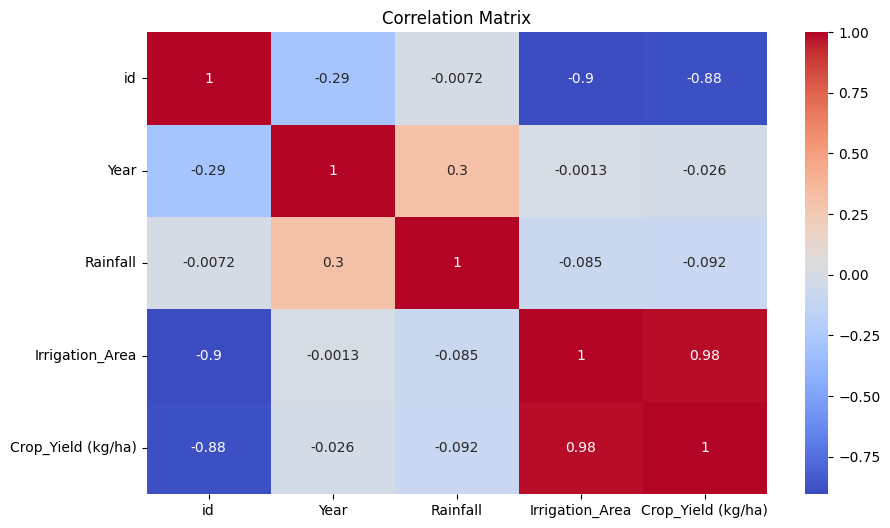

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


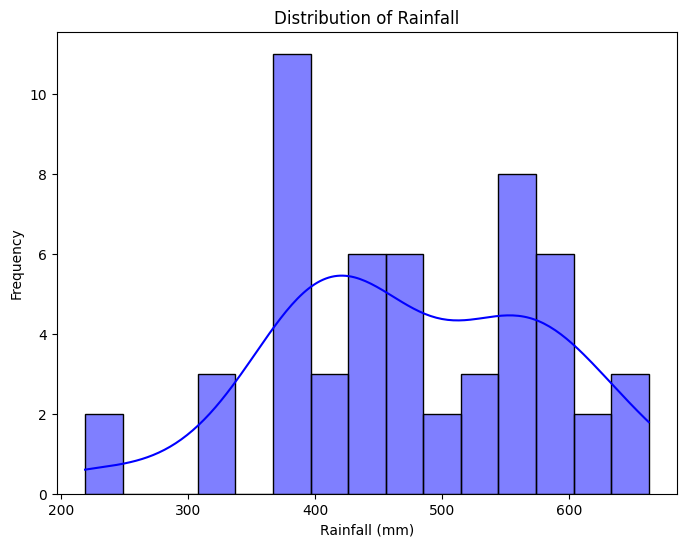

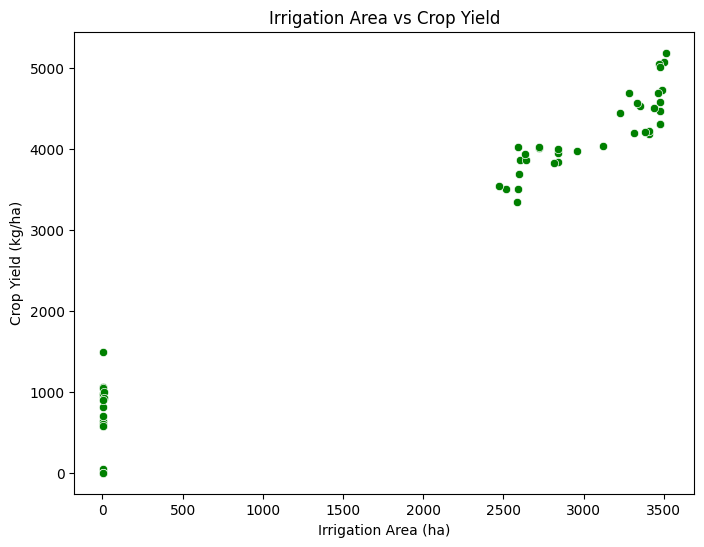


Best Parameters from GridSearchCV:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

Model Evaluation:
Mean Squared Error (MSE): 52385.86
R-squared (R2): 0.98


In [5]:
# Correlation Matrix
plt.figure(figsize=(10, 6))
# Select only numeric columns for correlation calculation
numeric_data = train_df.select_dtypes(include=np.number)
correlation_matrix = numeric_data.corr()  
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Distribution of Rainfall
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Rainfall'], kde=True, color='blue', bins=15)
plt.title("Distribution of Rainfall")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.show()

# Scatterplot of Irrigation Area vs Crop Yield
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_df['Irrigation_Area'], y=train_df['Crop_Yield (kg/ha)'], color='green')
plt.title("Irrigation Area vs Crop Yield")
plt.xlabel("Irrigation Area (ha)")
plt.ylabel("Crop Yield (kg/ha)")
plt.show()

# Preparing data for modeling
X = train_df[['Year', 'Rainfall', 'Irrigation_Area']]  # Features
y = train_df['Crop_Yield (kg/ha)']  # Target Variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training with RandomForest
rf_model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("\nBest Parameters from GridSearchCV:")
print(best_params)

# Train the final model
final_model = grid_search.best_estimator_

# Predict on test data
y_pred = final_model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

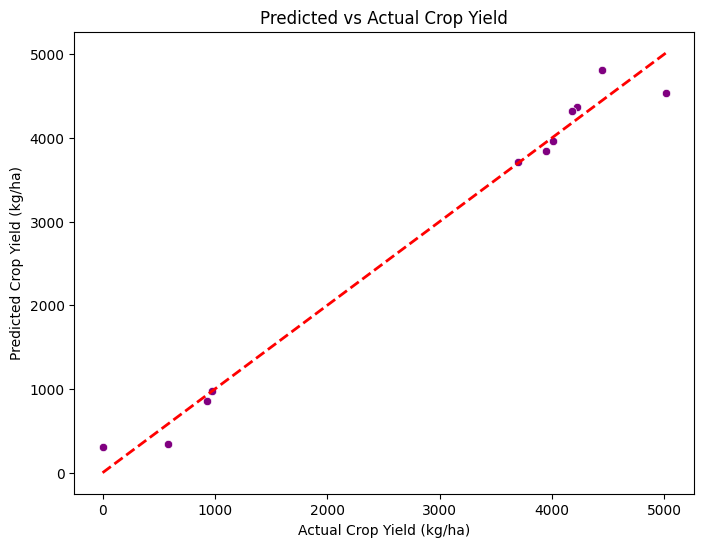

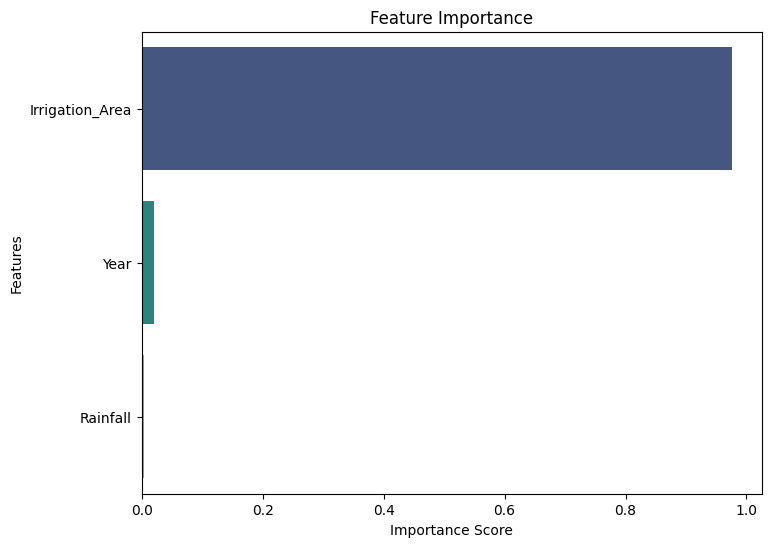

,Feature,Importance
2,Irrigation_Area,0.976280
0,Year,0.019669
1,Rainfall,0.004051


In [6]:
# Scatterplot of Predicted vs Actual Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Predicted vs Actual Crop Yield")
plt.xlabel("Actual Crop Yield (kg/ha)")
plt.ylabel("Predicted Crop Yield (kg/ha)")
plt.show()

# Feature Importance
importances = final_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

importance_df

In [7]:
# Select relevant features for the model
features = ['Year', 'Rainfall', 'Irrigation_Area']
X = train_df[features]
y = train_df['Crop_Yield (kg/ha)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameter grid for optimization
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the final model with the best parameters
final_model = grid_search.best_estimator_
final_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error (MSE): 52385.86
R-squared (R2): 0.98


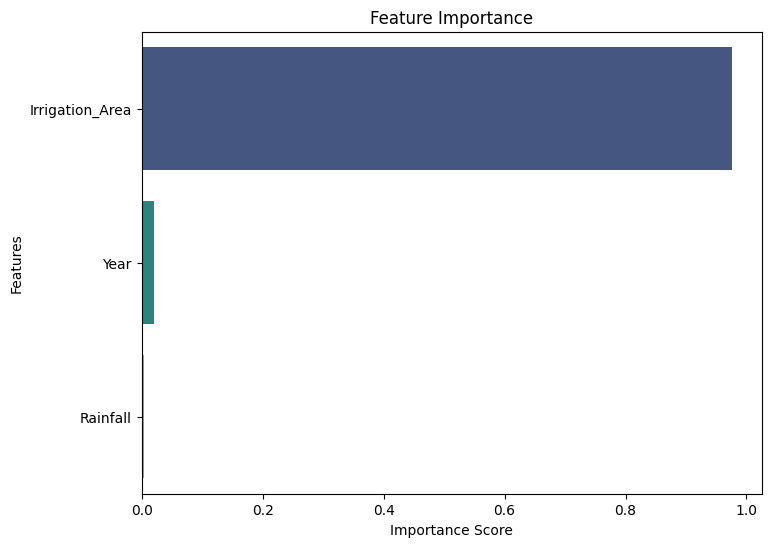

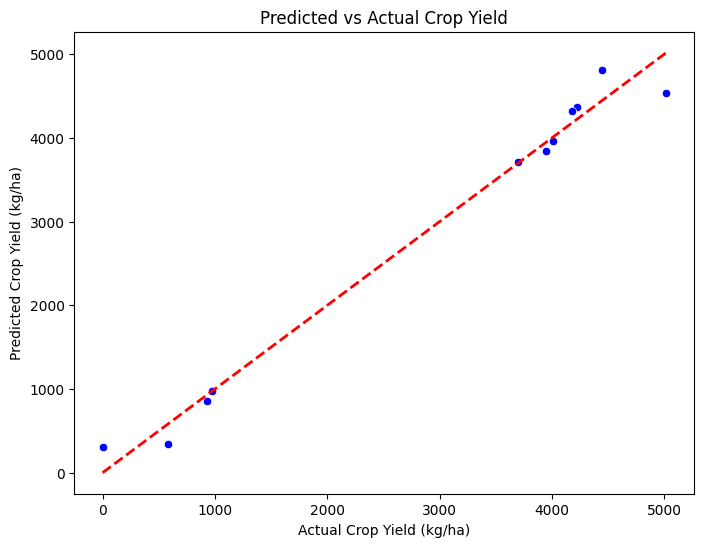

           Feature  Importance
2  Irrigation_Area    0.976280
0             Year    0.019669
1         Rainfall    0.004051


In [8]:
# Feature Importance
importances = final_model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Visualize Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Predicted vs Actual Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', edgecolor='w')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Predicted vs Actual Crop Yield")
plt.xlabel("Actual Crop Yield (kg/ha)")
plt.ylabel("Predicted Crop Yield (kg/ha)")
plt.show()

# Save the model (if needed)
import joblib
joblib.dump(final_model, "final_rf_model.pkl")

# Summary of Feature Importance
print(importance_df)